**Analysis Through Visualization**

- This in-depth analysis of Netflix content, focusing on various aspects such as release trends, genre distribution, and the relationship between release dates and content availability. 

- The analysis is presented through a series of visualizations, including bar charts, scatter plots, and heatmaps, which provide a clear and concise representation of the data. 

- Through visualizations, we aim to uncover patterns and insights that can inform content strategy and viewer preferences.

In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#importing the dataset
data = pd.read_csv("C:/Users/HP/Desktop/ANUDIP/Python/Project Python Anudip/cleaned_netflix_database_Anudip.csv")

**Horizontal Bar Chart: Ratings Distribution**

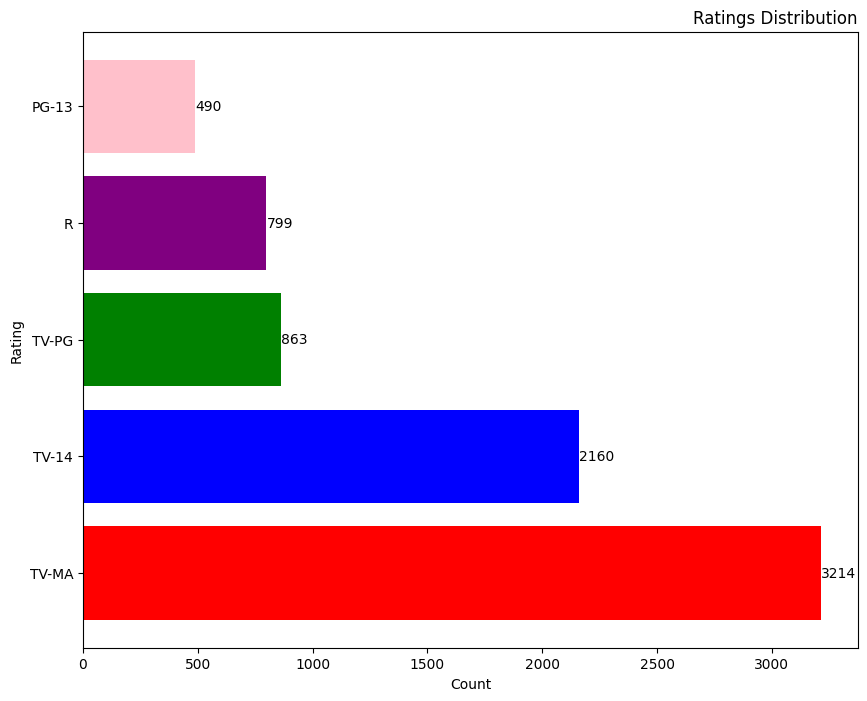

In [52]:
#Creating a bar chart showing the ratings

# Count the occurrences of each rating
rating_counts = data['rating'].value_counts().head()

# Create a horizontal bar chart
plt.figure(figsize=(10,8))
bar = plt.barh(rating_counts.index, rating_counts.values, color = ['r','b','green','purple','pink'])
plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Ratings Distribution', loc = 'right')
plt.bar_label(bar)
plt.show()

- This horizontal bar chart visualizes the distribution of ratings for the top five most common ratings in the Netflix dataset.

- Each bar represents the count of titles associated with a specific rating, providing a clear view of how content is categorized by audience suitability.

- The chart helps identify which ratings are most prevalent, indicating the types of content Netflix is offering to its viewers.

- Understanding the ratings distribution can inform content strategy, helping to align offerings with viewer preferences and regulatory standards.

**Pie Chart: Distribution of Release Years**

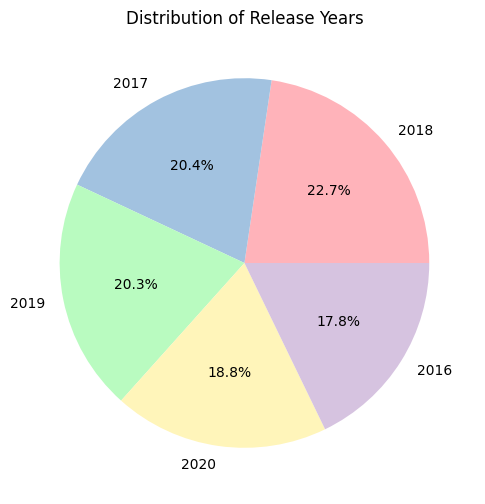

In [53]:
#Creating Pie chart showing Year distribution
plt.figure(figsize=(10,6))

# Count the occurrences of each rating
release_year_counts = data['release_year'].value_counts().head(5)
colors = ["#FFB3BA","#A2C2E0",'#B9FBC0','#FFF5BA','#D6C3E0']
# Create a pie chart
plt.pie(release_year_counts, labels = release_year_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Release Years')
plt.show()

- This pie chart visualizes the distribution of release years for the top five most common years in the dataset.

- Each slice of the pie represents the proportion of titles released in a specific year, providing a clear view of how content is distributed across different years.

- The chart helps identify trends in content production, showing which years had the highest number of releases on Netflix.

- Understanding the distribution of release years can inform content strategy and highlight periods of significant content acquisition.

**Histogram: Year Added Distribution**

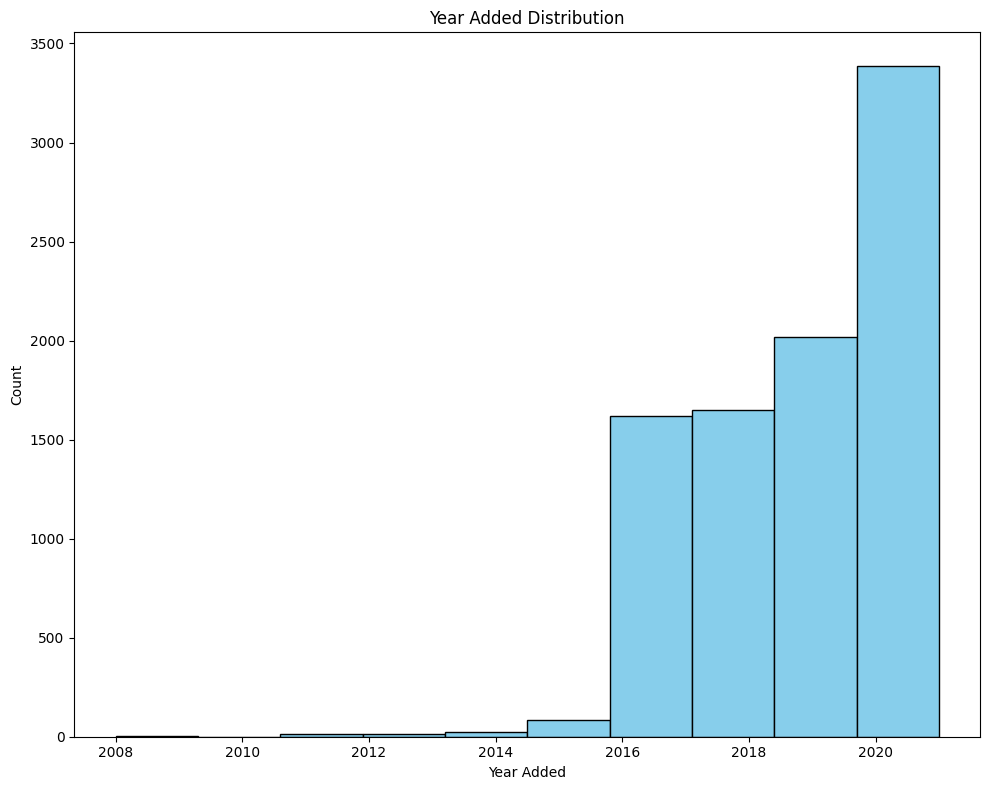

In [55]:
#Movies or Tvshows added on Netflix year

# Extract the year from the 'date_added' column
yearr = pd.to_datetime(data['date_added']).dt.year

# Create a histogram
plt.figure(figsize=(10, 8))
plt.hist(yearr, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.title('Year Added Distribution')
plt.tight_layout()
plt.show()

- This histogram visualizes the distribution of content added to Netflix over the years, showing how many movies and TV shows were added in each year.

- The x-axis represents the years in which content was added, while the y-axis indicates the count of titles added during those years.

- This visualization helps identify trends in content addition, revealing whether Netflix has increased or decreased its content offerings over time.

- Understanding the year added distribution can provide insights into Netflix's growth strategy and content acquisition practices.

**Bar Chart: Movies vs TV Shows**

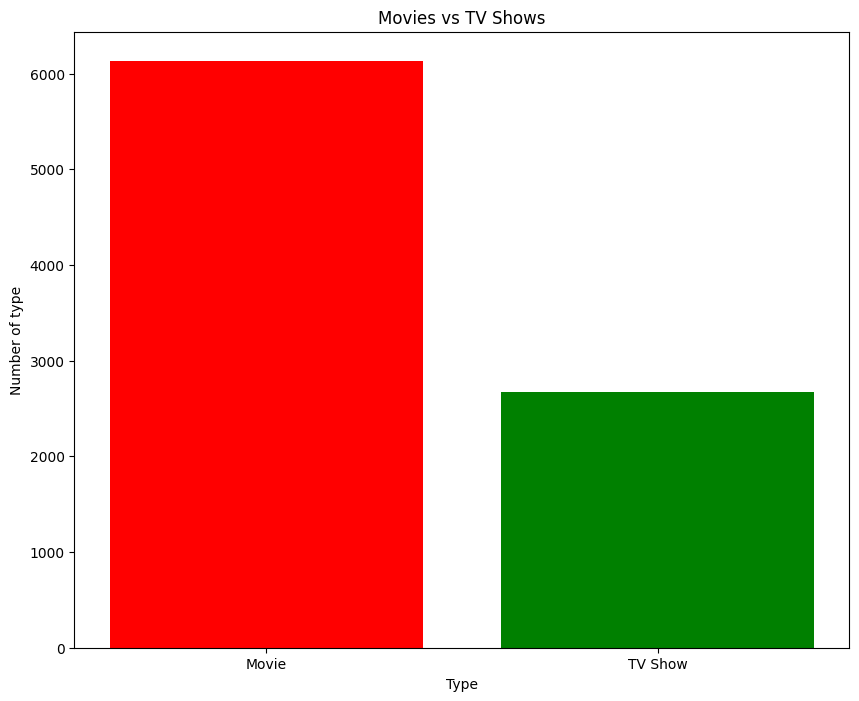

In [56]:
#Representing distribution of type
plt.figure(figsize=(10, 8))
type_count = data['type'].value_counts()
plt.bar(type_count.index ,type_count.values, color = ['red','green'])
plt.xlabel("Type")
plt.ylabel("Number of type")
plt.title("Movies vs TV Shows")
plt.show()

- This bar chart represents the distribution of content types on Netflix, specifically comparing the number of Movies to TV Shows.

- The x-axis categorizes the content into two types: Movies and TV Shows, while the y-axis indicates the count of each type.

- This visualization provides a clear overview of the content strategy employed by Netflix, highlighting whether the platform leans more towards movies or TV shows.

- Understanding this distribution can help inform content acquisition and production decisions, ensuring a balanced offering that meets viewer preferences.

**Histogram: Time Distribution of Movies**

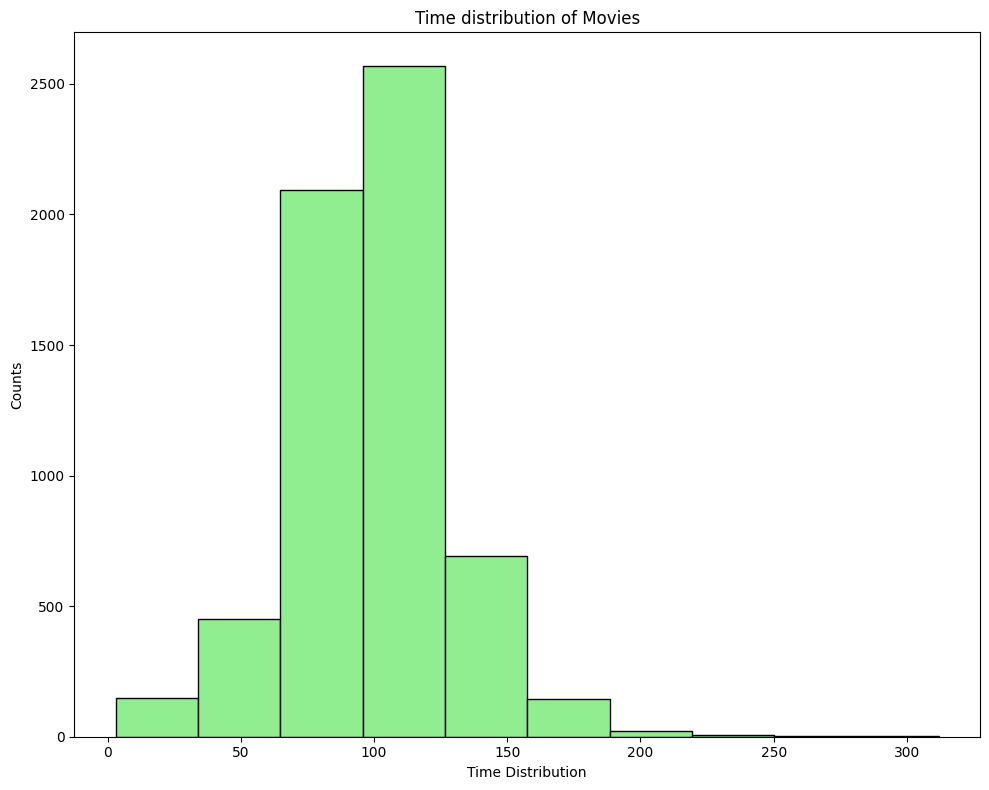

In [57]:
#duration division

duration_count = data['Duration_Movies'].dropna()

# Create a histogram
plt.figure(figsize=(10, 8))
plt.hist(duration_count, bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Time Distribution')
plt.ylabel('Counts')
plt.title('Time distribution of Movies')
plt.tight_layout()
plt.show()

- This histogram visualizes the distribution of movie durations in the Netflix dataset, providing insights into how long movies typically are.

- The x-axis represents the duration of movies, while the y-axis shows the count of movies falling within each duration range.

- By analyzing the distribution, we can identify trends such as whether most movies are short, medium, or long in duration.

- This information can be useful for understanding viewer preferences regarding movie length and can inform content strategy for future acquisitions.

**Horizontal Bar Chart: Top 10 Most Common Genres on Netflix**

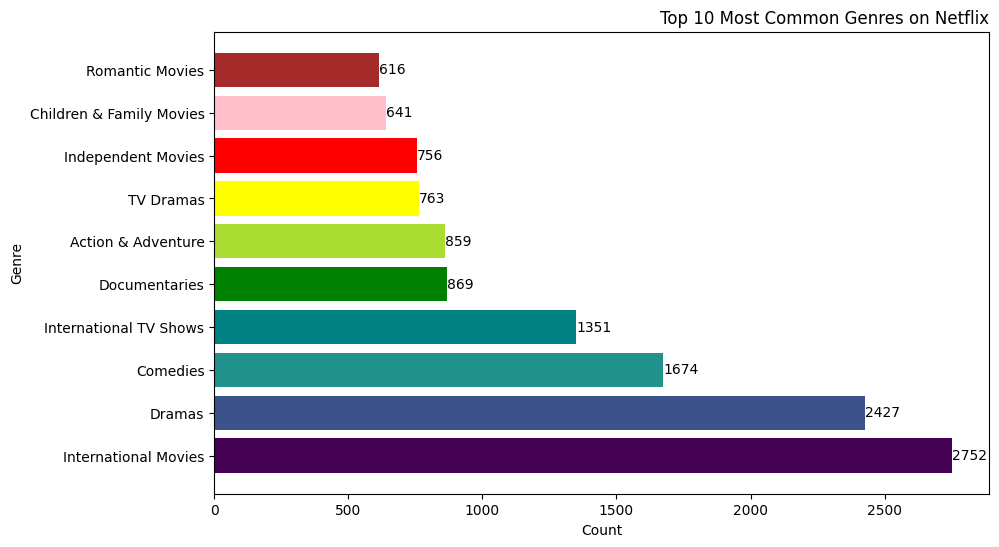

In [58]:
from collections import Counter
# Join all genres into a single string and split them into a list
all_genres = ', '.join(data['listed_in'].dropna()).split(', ')

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# Create a DataFrame from the genre counts
df_genre = pd.DataFrame(list(genre_counts.items()), columns=['genre', 'Count'])

# Sort the DataFrame by count in descending order
df_genre = df_genre.sort_values(by='Count', ascending=False)

# Select the top 10 genres
top_genres = df_genre.head(10)

# Define colors for the bar chart
colors = ["#440154", "#3b528b", "#21918c", "Teal", "Green", "#aadc32", "Yellow", "red", "pink", 'brown']

# Create a bar chart
plt.figure(figsize=(10, 6))
bar = plt.barh(top_genres['genre'], top_genres['Count'], color=colors)
plt.title("Top 10 Most Common Genres on Netflix", loc='right')
plt.xlabel("Count")
plt.ylabel("Genre")
plt.bar_label(bar)
plt.show()

- This horizontal bar chart displays the top 10 most common genres available on Netflix, providing a clear visual representation of genre popularity.

- The chart highlights which genres dominate the platform, allowing for quick insights into content diversity.

- By analyzing the counts of each genre, stakeholders can identify trends in viewer preferences and potential gaps in genre offerings.

- This information can be valuable for content acquisition strategies, helping to align Netflix's library with audience interests.

**Pie Chart: Distribution of Genres in Netflix Content**

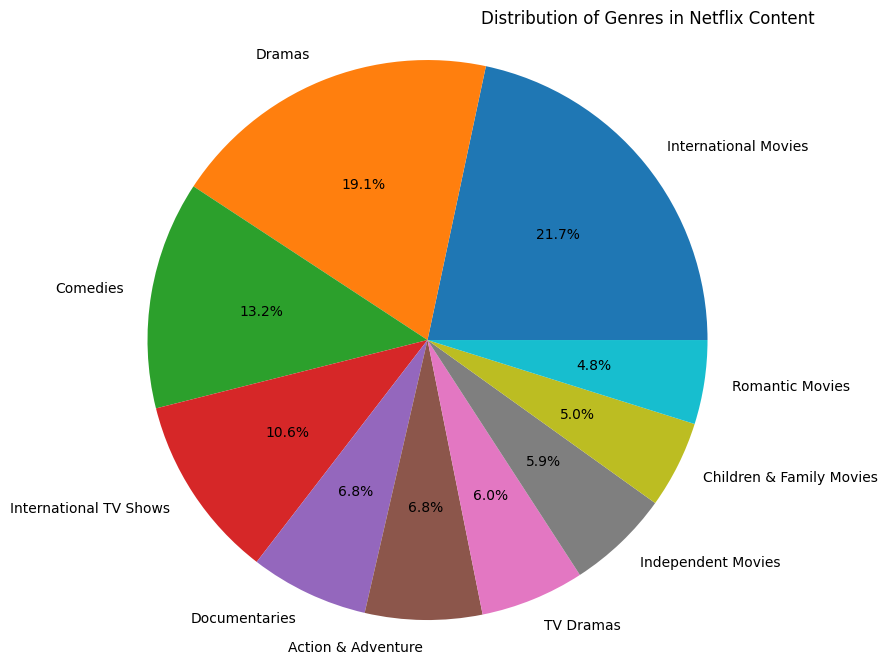

In [60]:
# Count the occurrences of each genre
genre_counts = data['listed_in'].dropna().str.split(', ').explode().value_counts()

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(genre_counts[:10], labels=genre_counts.index[:10], autopct='%1.1f%%', startangle=360)
plt.title('Distribution of Genres in Netflix Content',loc= 'right')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- The pie chart visualizes the proportion of different genres available on Netflix.

- It provides insights into the diversity of content, helping to understand viewer preferences and potential gaps in genre offerings.

**Line Chart: Difference Between Year Added and Release Year**

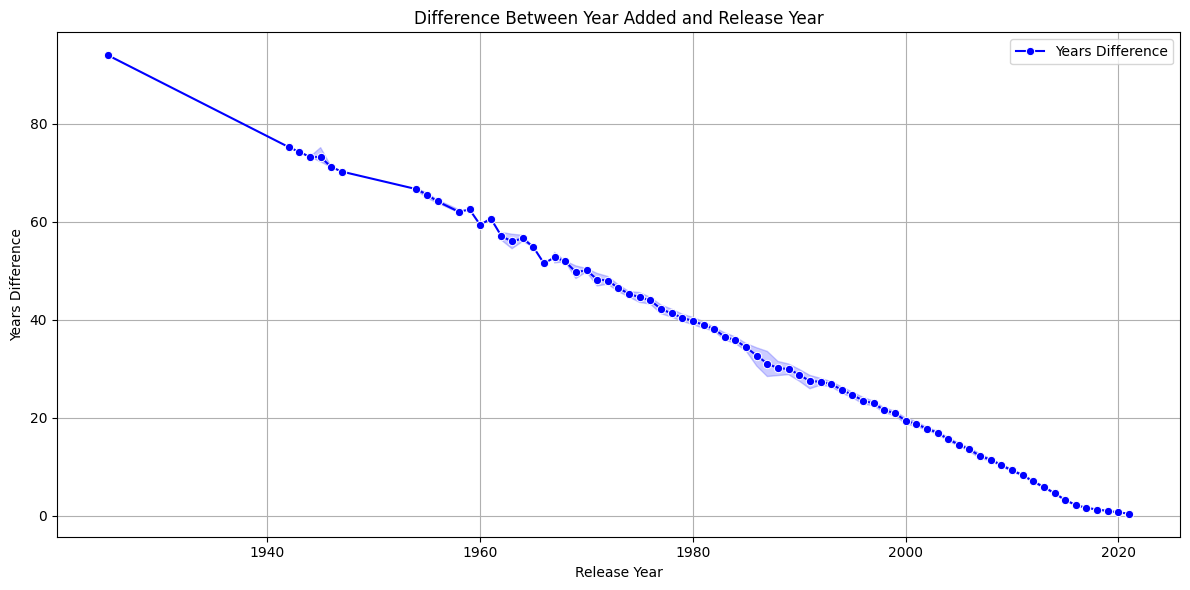

In [61]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Create a release date from 'release_year'
data['release_date'] = pd.to_datetime(data['release_year'].astype(str) + '-01-01')

# Calculate the difference in years
years_difference = (data['date_added'] - data['release_date']).dt.days / 365.25

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['release_year'], y=years_difference, marker='o', color='blue', label='Years Difference')
plt.title('Difference Between Year Added and Release Year')
plt.xlabel('Release Year')
plt.ylabel('Years Difference')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

- This chart illustrates the average time difference between when content is added to Netflix and its original release year.

- It highlights trends in content availability, showing how long it typically takes for movies and shows to appear on the platform after their theatrical release.

**Bar Chart: Number of Releases in Each Month**

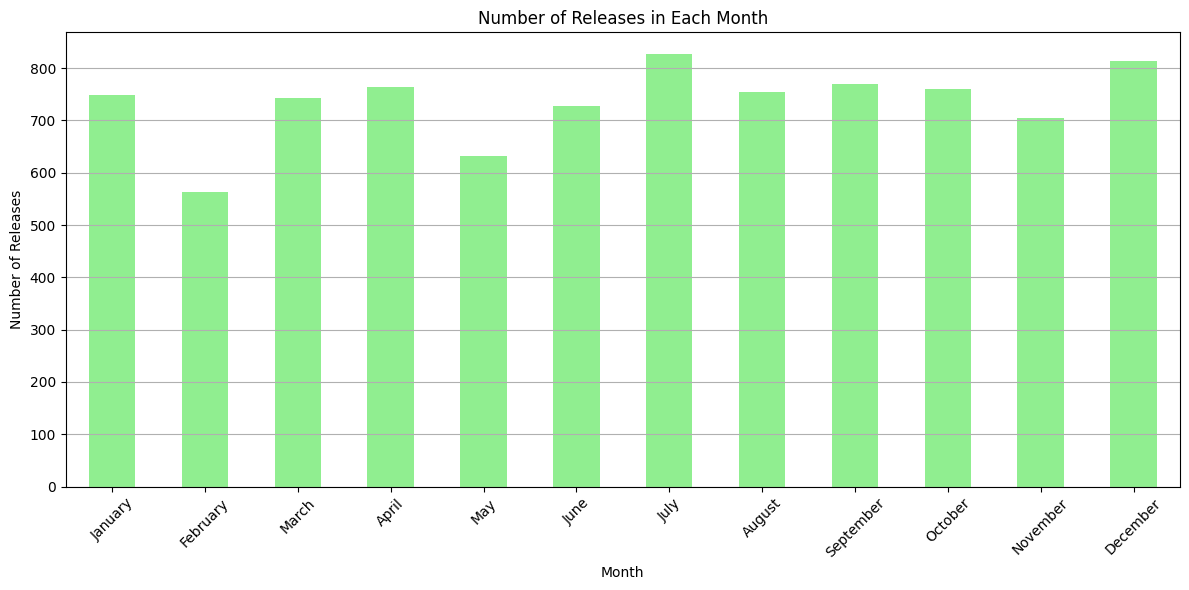

In [62]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract month names from 'date_added'
month_names = data['date_added'].dt.month_name()

# Count the number of releases for each month
release_counts = month_names.value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plotting
plt.figure(figsize=(12, 6))
release_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Releases in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- This bar chart displays the total number of releases for each month, providing a clear view of seasonal trends in content addition.

- It helps identify peak months for new content, which can be useful for marketing and promotional strategies.

**Double Bar Graph: Number of Releases Each Month by Type**

<Figure size 1500x800 with 0 Axes>

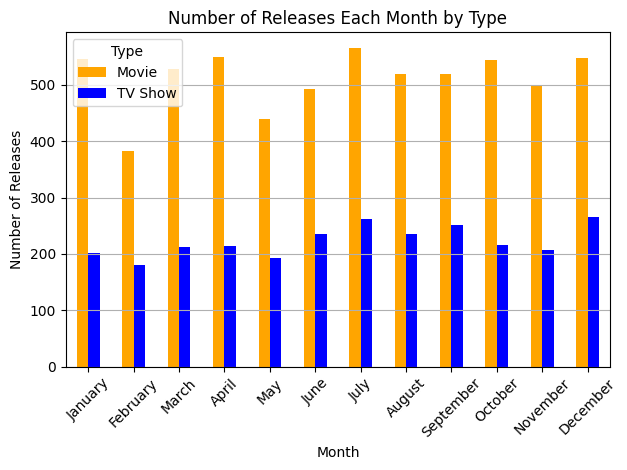

In [63]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract month names and types directly
month_names = data['date_added'].dt.month_name()
type_counts = data['type'].fillna('Unknown')  # Handle any missing types

# Count the number of releases for each month by type
monthly_counts = {}
for month in month_names.unique():
    monthly_counts[month] = data[data['date_added'].dt.month_name() == month]['type'].value_counts()

# Create a DataFrame for plotting
monthly_counts_df = pd.DataFrame(monthly_counts).fillna(0).T

# Reorder months for plotting
monthly_counts_df = monthly_counts_df.reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plotting
plt.figure(figsize=(15,8 ))  # Set the figure size here
monthly_counts_df.plot(kind='bar', stacked=False, color=['orange', 'blue'])
plt.title('Number of Releases Each Month by Type')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- This graph categorizes the number of releases by type (Movies and TV Shows) for each month.

- It reveals the distribution of content types over the year, indicating whether Netflix is focusing more on movies or TV shows during specific months.

**Line Graph: Average Duration by Rating**

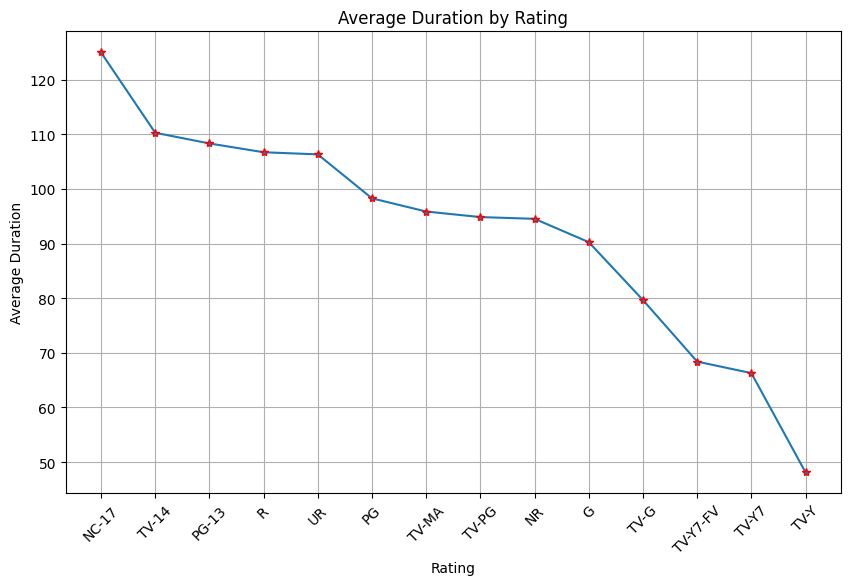

In [64]:
#Visualizing the Average duration of all ratings

mean_duration_by_rating = data.groupby('rating')['Duration_Movies'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.plot(mean_duration_by_rating.index, mean_duration_by_rating.values, marker='*',markeredgecolor = 'r')
plt.title('Average Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- This line graph visualizes the average duration of movies across different rating categories on Netflix.

- It highlights trends in movie length, showing which ratings tend to have longer or shorter films.

- The graph can reveal interesting patterns, such as whether higher-rated films (e.g., NC-17) generally have longer runtimes compared to lower-rated films (e.g., TV-Y).

- This information can be valuable for understanding content production trends and viewer expectations based on ratings.

**Trend Line: Total Releases Over the Years**

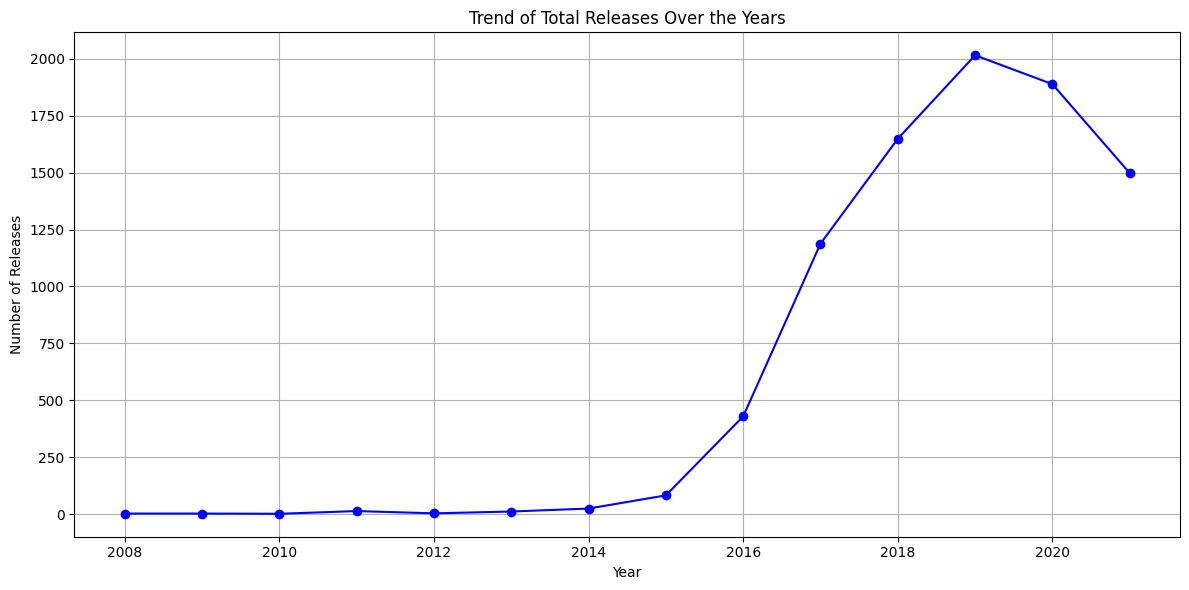

In [66]:
# Count the number of releases for each year
yearly_counts = data['date_added'].dt.year.value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='blue')
plt.title('Trend of Total Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid()
plt.tight_layout()
plt.show()

- This line graph shows the trend of total releases over the years, indicating growth or decline in content availability.

- It provides a clear view of Netflix's expansion strategy and content acquisition over time.

**Heatmap: Monthly Releases Over Years**

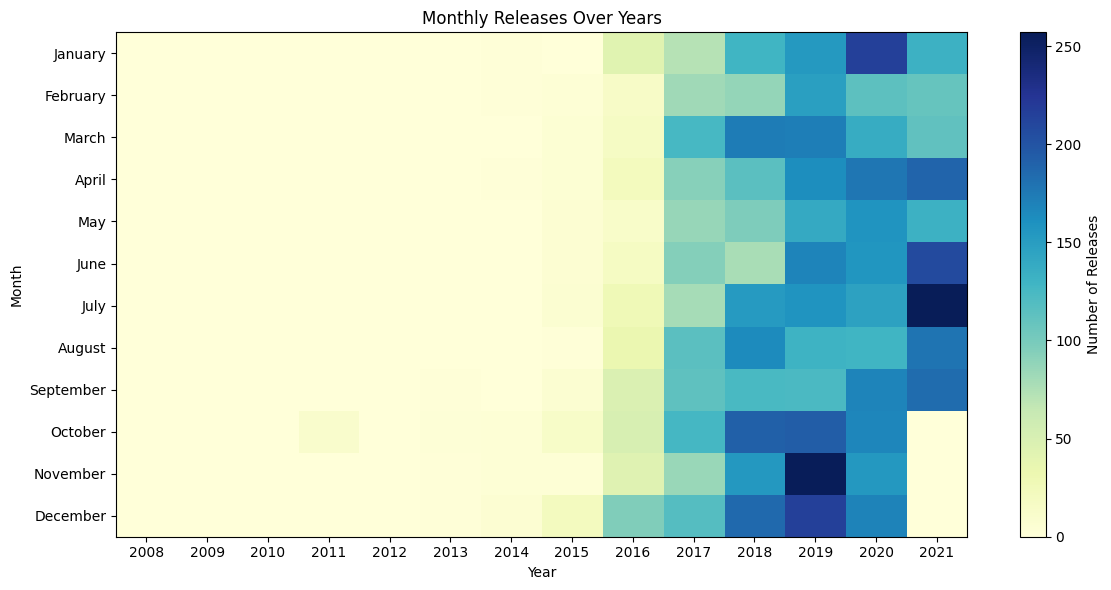

In [67]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Create a pivot table for the heatmap without adding new columns
heatmap_data = data.groupby([data['date_added'].dt.month_name(), data['date_added'].dt.year]).size().unstack(fill_value=0)

# Reorder months for plotting
heatmap_data = heatmap_data.reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plotting
plt.figure(figsize=(12, 6))
plt.imshow(heatmap_data, aspect='auto', cmap='YlGnBu')
plt.colorbar(label='Number of Releases')
plt.title('Monthly Releases Over Years')
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns)
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

- The heatmap illustrates the number of releases per month across different years.

- It reveals trends over time, helping to identify whether Netflix is increasing or decreasing its content output in specific months or years.

**Box Plot: Movie Durations by Rating**

<Figure size 1200x600 with 0 Axes>

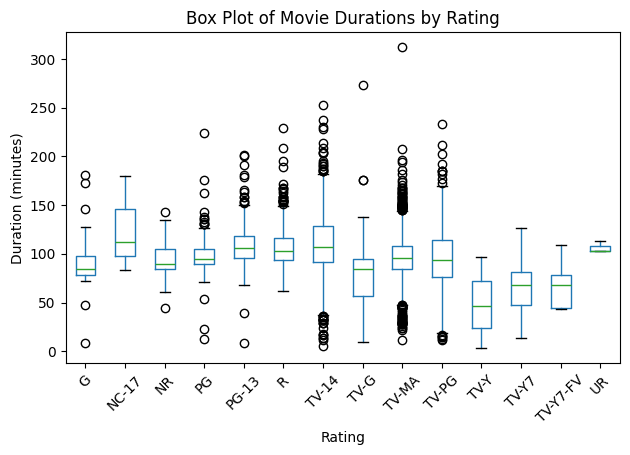

In [68]:
# Convert 'Duration_Movies' to numeric, handling any errors
data['Duration_Movies'] = pd.to_numeric(data['Duration_Movies'], errors='coerce')

# Plotting
plt.figure(figsize=(12, 6))
data.boxplot(column='Duration_Movies', by='rating', grid=False)
plt.title('Box Plot of Movie Durations by Rating')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- This box plot analyzes the distribution of movie durations across different rating categories.

- It highlights trends in duration, showing which ratings tend to have longer or shorter films, and identifies any outliers in the dataset.